In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kde import KDE

In [73]:
df = pd.read_csv('../../../data/faithful.tsv', sep='\t')
X = df[['eruptions', 'waiting']].values

DISTRIBUTION CHECK

In [74]:
kde = KDE(bandwidth=.3)
kde.set_kernel('gaussian')
kde.fit(X)

KDE(bandwidth=0.3)

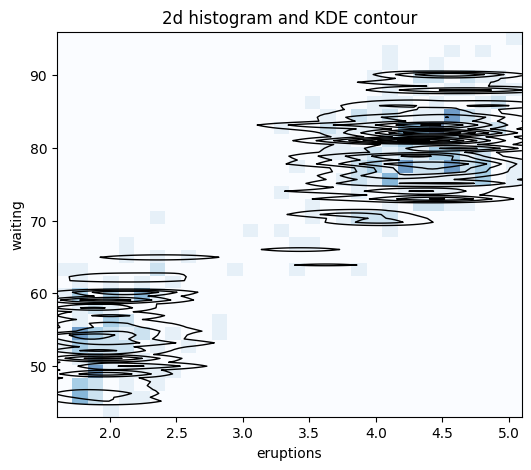

In [75]:
plt.figure(figsize=(6,5))
plt.hist2d(X[:,0], X[:,1], bins=30,
           density=True, cmap='Blues', 
           alpha=0.6)

xx = np.linspace(X[:,0].min(), X[:,0].max(), 100)
yy = np.linspace(X[:,1].min(), X[:,1].max(), 100)
grid = np.stack(np.meshgrid(xx, yy), -1).reshape(-1,2)
zz = kde.score_samples(grid).reshape(100,100)
plt.contour(xx, yy, zz, colors='k', linewidths=1)
plt.xlabel('eruptions'); plt.ylabel('waiting')
plt.title('2d histogram and KDE contour')
plt.show()

ANOMALY

In [76]:
kde = KDE(bandwidth=.3)
kde.set_kernel('gaussian')
kde.fit(X)

KDE(bandwidth=0.3)

min density: 0.006501427414765404


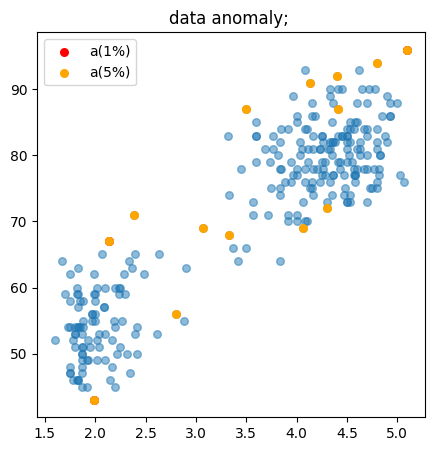

In [77]:
kde_score = kde.score_samples(X)
thr1 = np.percentile(kde_score, 1)

m1 = kde_score < thr1
m5 = kde_score < np.percentile(kde_score, 5)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c='C0', s=30, alpha=.5)
plt.scatter(X[m1,0], X[m1,1], c='red', s=30, label='a(1%)')
plt.scatter(X[m5,0], X[m5,1], c='orange', s=30, label='a(5%)')
plt.legend()
plt.title('data anomaly; ')
print("min density:", kde_score.min())
plt.show()


Distribution Comparison


KL-divergence between a and b: 7.486908040619692
hellinger distance between a and b: 0.6446667723499973


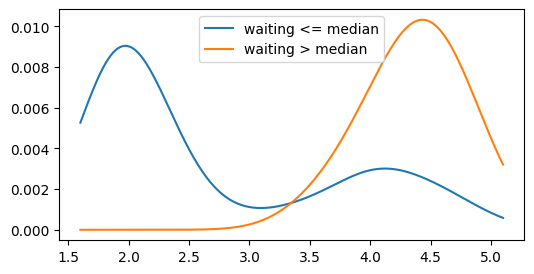

In [78]:
mid = np.median(df['waiting'])

a = df[df['waiting'] <= mid][['eruptions']].values
b = df[df['waiting'] > mid][['eruptions']].values

kde_a = KDE(bandwidth=.3)
kde_a.set_kernel('gaussian')
kde_a.fit(a)
kde_b = KDE(bandwidth=.3)
kde_b.set_kernel('gaussian')
kde_b.fit(b)


x1d = np.linspace(df['eruptions'].min(), df['eruptions'].max(), 300)[:, None]
p = kde_a.score_samples(x1d); p /= p.sum()
q = kde_b.score_samples(x1d); q /= q.sum()

kl = np.sum(p*np.log( (p + 1e-10) / (q + 1e-10) ))
hell= np.sqrt(1 - np.sum(np.sqrt(p*q)))

print('KL-divergence between a and b:', kl)
print('hellinger distance between a and b:', hell)

plt.figure(figsize=(6,3))
plt.plot(x1d, p, label='waiting <= median', color='C0')
plt.plot(x1d, q, label='waiting > median', color='C1')
plt.legend()
plt.show()